<a href="https://colab.research.google.com/github/leehj2586/leehj/blob/ESAA_OB/ESAA_1108_%ED%8C%8C%EC%9D%B4%EC%8D%AC%EB%94%A5%EB%9F%AC%EB%8B%9D%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C3%EC%9E%A5_%EC%BC%80%EB%9D%BC%EC%8A%A4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

파이썬 딥러닝 텐서플로 ch3. 1~3 p.50-86


# Part3. 케라스


## 01. 딥러닝 준비
: GPU 연산을 직접 실행하지 않고, 텐서플로로 벡엔드 엔진을 지정하여 사용
###1-1. 주요 용어
#### **하이퍼파라미터**
- 모델 훈련 시, 사용자가 직접 설정하는 설정값
- 학습 속도, 반복 훈련 횟수

#### **과소적합 vs 과대적합**
데이터가 편향되거나, 예측 데이터와 학습 데이터가 다른 분포를 가질 경우 예측 성능이 매우 떨어짐.
- 그 외에 모델 예측 성능 감소 이유
    - 과소적합: 모델이 충분히 학습되지 않은 경우
    - 과대적합: 학습 데이터에 지나치게 반복학습하여 과도하게 적합된 상태   
    → 훈련 데이터의 노이즈까지 반영하여 예측 데이터에 대한 예측 오차 발생확률이 커짐


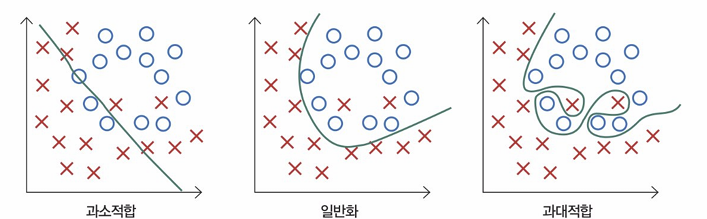

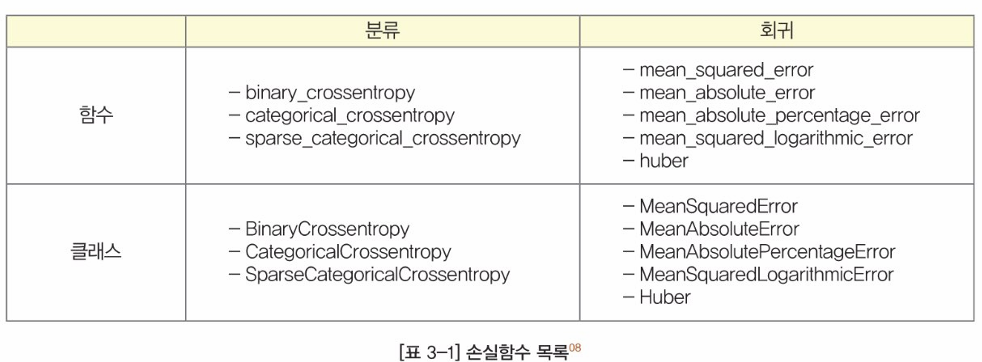

In [ ]:
import tensorflow as tf
tf.keras.losses.BinaryCrossentropy()
tf.keras.losses.binary_crossentropy

<function keras.src.losses.losses.binary_crossentropy(y_true, y_pred, from_logits=False, label_smoothing=0.0, axis=-1)>

#### **에포크 epoch**
딥러닝 모델이 반복 훈련할때 데이터셋을 전부 학습에 사용하는 1회의 훈련 루프
#### **손실함수 loss function**
: 예측값과 정답값의 차이 또는 오차(Error, 출력값과 실제값의 차이)
- 사용자 정의 필요
- 분류/회귀에 따라 다르게 적용
    - 지도학습
        - 이진 분류: binary_crossentropy → 활성화함수: sigmoid
        - 다중 분류: categorical_crossentropy → 활성화함수: softmax
    - 회귀: 평균제곱오차, 평균 절대값 오차



#### **경사하강법 gradient descent**
: 딥러닝 훈련 시, 모델 내부 가중치에 대한 미분 값을 구하고 목적 함수 값이 낮아지는 방향으로 차감하면서 최소 함수 값을 갖도록 하는 방법

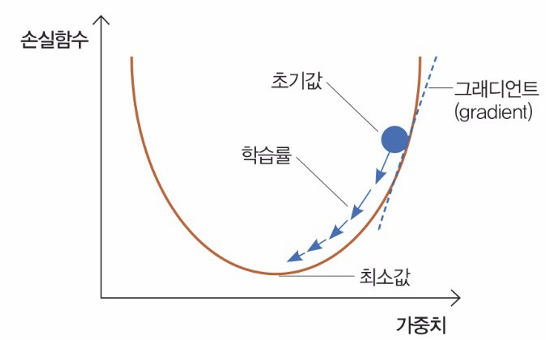

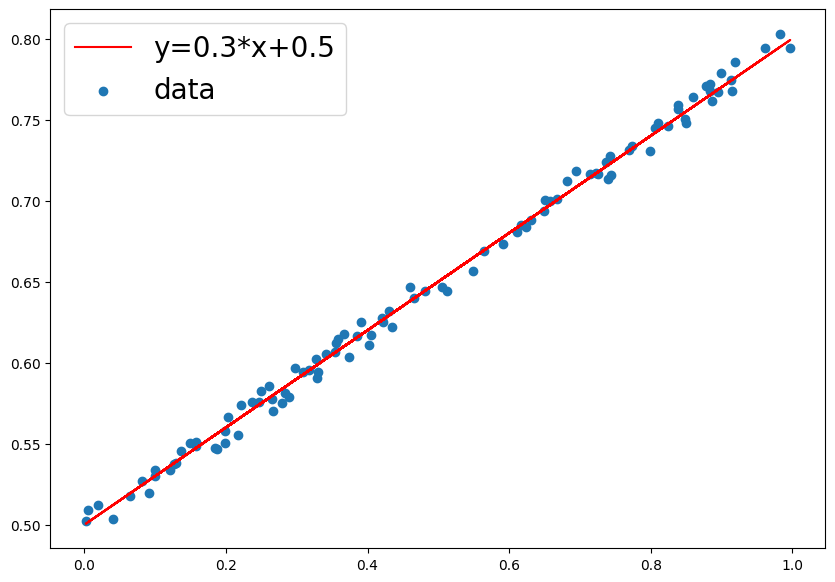

w:0.3, b:0.5


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def make_linear(w=0.5, b=0.8, size = 50, noise = 1.0):
    x = np.random.rand(size)
    y = w * x + b
    noise = np.random.uniform(-abs(noise), abs(noise), size = y.shape)
    yy = y + noise
    plt.figure(figsize = (10,7))
    plt.plot(x, y, color = 'r', label = f'y={w}*x+{b}')
    plt.scatter(x, yy, label = 'data')
    plt.legend(fontsize = 20)
    plt.show()
    print(f'w:{w}, b:{b}')
    return x, yy

x, y = make_linear(w=0.3, b= 0.5, size = 100, noise = 0.01)

In [ ]:
# 최대 반복 횟수
num_epoch = 1000

# 학습률(learning rate)
learning_rate = 0.005

# 에러 기록
errors = []

# random 한 값으로 w, b를 초기화
w = np.random.uniform(low = 0.0, high = 1.0)
b = np.random.uniform(low = 0.0, high = 1.0)

for epoch in range(num_epoch):
    # Hypothesis 정의
    y_hat = w * x + b

    # Loss Function 정의
    error = 0.5*((y_hat-y) ** 2).sum()
    if error < 0.005:
        break
    # gradient 미분 계산
    w = w - learning_rate * ((y_hat-y) * x).sum()
    b = b - learning_rate * (y_hat - y).sum()

    errors.append(error)

    if epoch % 5 == 0:
        print('{0:2} w = {1:.5f}, b = {2:.5f} error = {3:.5f}'.format(epoch, w, b, error))
print('-----' * 15)
print('{0:2} w = {1:.1f}, b = {2:.1f} error = {3:.5f}'.format(epoch, w, b, error))

 0 w = 0.40044, b = 0.36534 error = 2.49348
 5 w = 0.41408, b = 0.44064 error = 0.05660
10 w = 0.39739, b = 0.44988 error = 0.04114
15 w = 0.38301, b = 0.45732 error = 0.03009
20 w = 0.37079, b = 0.46364 error = 0.02213
25 w = 0.36043, b = 0.46900 error = 0.01640
30 w = 0.35162, b = 0.47355 error = 0.01226
35 w = 0.34415, b = 0.47742 error = 0.00928
40 w = 0.33781, b = 0.48070 error = 0.00714
45 w = 0.33242, b = 0.48348 error = 0.00559
---------------------------------------------------------------------------
48 w = 0.3, b = 0.5 error = 0.00487


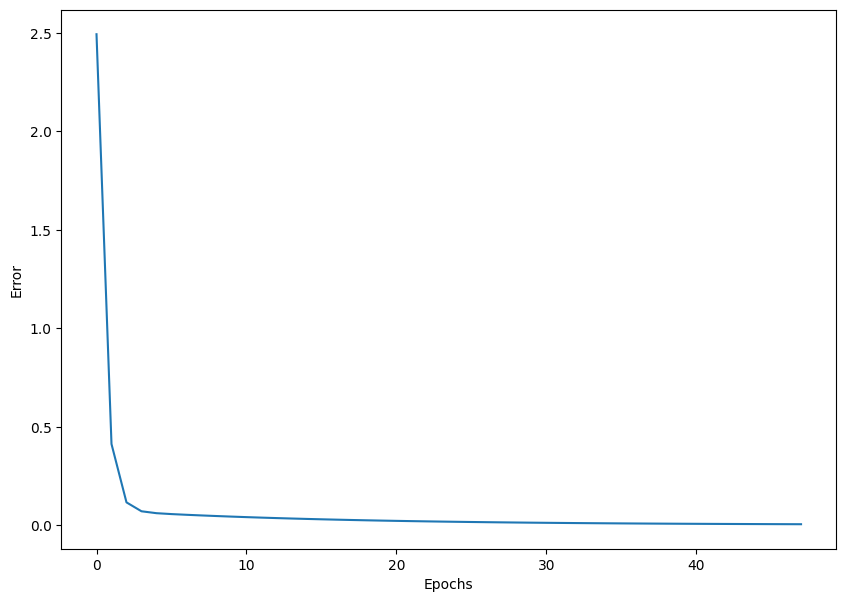

In [ ]:
plt.figure(figsize = (10,7))
plt.plot(errors)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

### 1-2. 딥러닝 프로세스



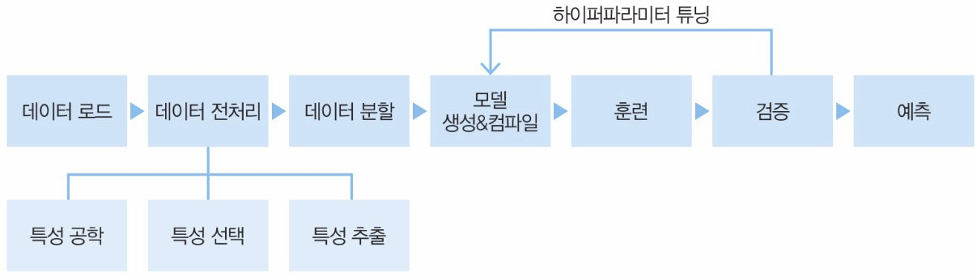

####**데이터 전처리**
: 데이터 가공 단계 차원 변경, 스케일 조정, 데이터셋 형태 구상 및 정의
####**모델 생성**
: 모델 구조 정의 및 생성
- 순차적 구조 : Sequential API
- 다중 입력 및 출력 O 복잡한 구조
    - Functional API
    - Model Subclassing

    
####**모델 컴파일**
: 모델 훈련에 사용할 손실함수(loss), 옵티마이저, 평가지표(metrics) 정의
####**모델 훈련** → 필수 프로세스
: 모델 훈려넹 필요한 매개변수(train/test dataset, epoch, batch_size, callback 함수) 전달
####**모델 검증**
: 훈련 완료된 모델 검증 (with 검증 데이터 셋(훈련 시 사용X))  
→ 예측값을 정답과 비교하여 평가지표 계산 → 결과 바탕 모델 수정 및 컴파일, 훈련, 재평가 반복 → 목표 성능 도달 시 까지 반복
####**모델 예측**
: 훈련과 검증이 완료된 모델로 테스트 셋에 대해 모델이 예측 및 결과 반환

## 02. 단순 신경망 훈련
### 2-1. 선형회귀
    - 단순 선형 회귀: 하나의 X가 Y에 미치는 영향 → 1차 함수 관계
    
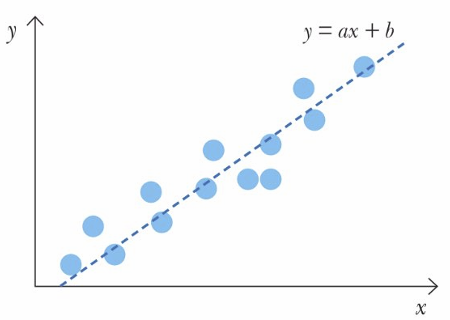

### 2-2. 뉴런
: 인공 신경망 모델을 구성하는 하나의 신경
+) 역전파: 손실함수 미분결과인 그래디언트를 출력층에서 입력층 순으로 역으로 계산하고 저장
### 2-3. Dense 레이어
: 심층 신경망 모델을 구성하는 가장 기본 레이어 (=완전 연결층: 모든 뉴런이 화살표로 연결)
- 입력레이어 뉴런 1개
- 은닉 레이어 뉴런 2개
- 출력 레이어 뉴런 1개

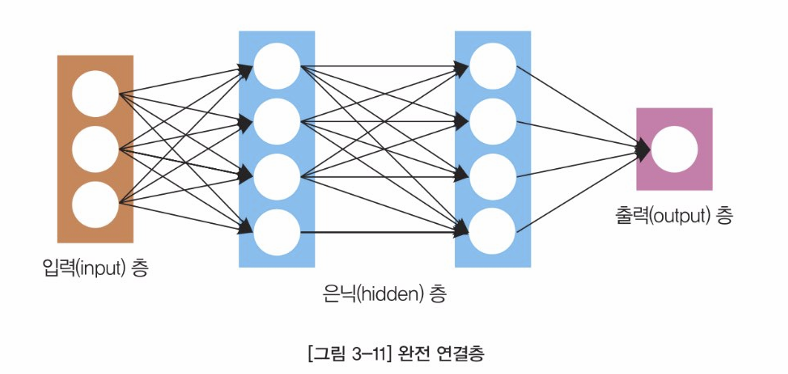


In [ ]:
tf.keras.layers.Dense(10)

tf.keras.layers.Dense(10, activation = 'relu')

<Dense name=dense_1, built=False>

### 2-4. 데이터셋 만들기


- 단순선형회귀를 지도학습 방식으로 훈련하기 위해 x, y 데이터 생성

In [ ]:
x = np.arange(1,6)

# y = 3x + 2
y = 3 * x + 2
print(x)
print(y)

[1 2 3 4 5]
[ 5  8 11 14 17]


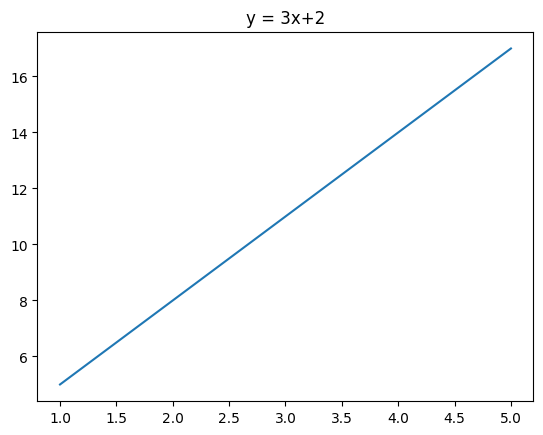

In [ ]:
import matplotlib.pyplot as plt

# 시각화
plt.plot(x, y)
plt.title('y = 3x+2')
plt.show()

### 2-5. Sequential API
- 층을 이어 붙이듯 시퀀스에 맞게 일렬로 연결하는 방식 ( 입력 ~ 출력 레이어까지 순서 O)


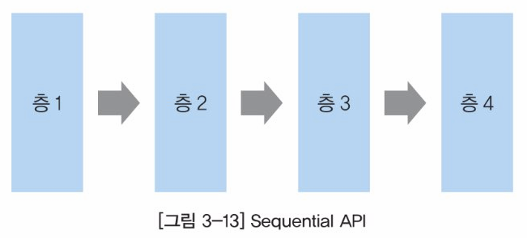

#### **모델 구조**

In [ ]:
import tensorflow as tf

# 리스트형
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(1)
])

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Dense(5))
model.add(tf.keras.layers.Dense(1))

#### **입력 데이터 형태**
- 첫번째 층: input_shape 지정 필요

In [ ]:
import tensorflow as tf
model = tf.keras.Sequential([
    # 입력 데이터의 shape = (150,4)인 경우 input_shape 지정
    tf.keras.layers.Dense(10, input_shape=[4]),
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(1),
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#### **단순선형회귀 모델 정의**

In [ ]:
# 단순 선형회귀 모델 생성
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape = [1])
])

### 2-6. 모델 요약
- model.summary()

In [ ]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                     │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

### 2-7. 컴파일
- 옵티마이저
- 손실함수
- 평가지표   
→ 3가지 방법으로 지정 가능 (클래스 인스턴스, 함수, 사전 정의된 문자열)  
→ 클래스 인스턴스: 하이퍼파라미터 직접 지정 가능  
→ 문자열: 기본 값만 가능, 수정 불가

In [ ]:
# 긴 문자열 지정
model.compile(optimizer = 'sgd', loss = 'mean_squared_error',
              metrics = ['mean_squared_error', 'mean_absolute_error'])

In [ ]:
# 짧은 문자열 지정
model.compile(optimizer = 'sgd', loss = 'mse', metrics = ['mse', 'mae'])

In [ ]:
# 클래스 인스턴스 지정
model.compile(optimizer = tf.keras.optimizers.SGD(learning_rate = 0.005),
              loss = tf.keras.losses.MeanAbsoluteError(),
              metrics = [tf.keras.metrics.MeanAbsoluteError(),
                         tf.keras.metrics.MeanSquaredError()])

In [ ]:
# 컴파일
model.compile(optimizer = 'sgd', loss = 'mse', metrics = ['mae'])

### 2-8. 훈련
가중치 텐서를 업데이트 하는 과정

In [ ]:
# 훈련
model.fit(x, y, epochs = 5)

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 689ms/step - loss: 142.7693 - mae: 11.1440
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 83.2850 - mae: 8.5494
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 48.6199 - mae: 6.5687
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 28.4182 - mae: 5.0564
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 16.6451 - mae: 3.9019


In [24]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])
# 컴파일
model.compile(optimizer = 'sgd', loss = 'mse', metrics = ['mae'])

# 훈련
history = model.fit(x, y, epochs = 1200)

Epoch 1/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step - loss: 69.3042 - mae: 7.8542
Epoch 2/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 40.5243 - mae: 6.0492
Epoch 3/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 23.7519 - mae: 4.6711
Epoch 4/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 13.9769 - mae: 3.6189
Epoch 5/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 8.2796 - mae: 2.8155
Epoch 6/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 4.9585 - mae: 2.2020
Epoch 7/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 3.0223 - mae: 1.7335
Epoch 8/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 1.8931 - mae: 1.3757
Epoch 9/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 1.2341 - mae: 1.1024
Epoch 10/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.8492 - mae: 0.8936
Epoch 11/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.6241 - mae: 0.7340
Epoch 12/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.4920 - mae: 0.6120
Epoch 13/1200
1/1 ━━━━━━━━━━━━━━

- epoch별 훈련 손실 및 평가지표 시각화

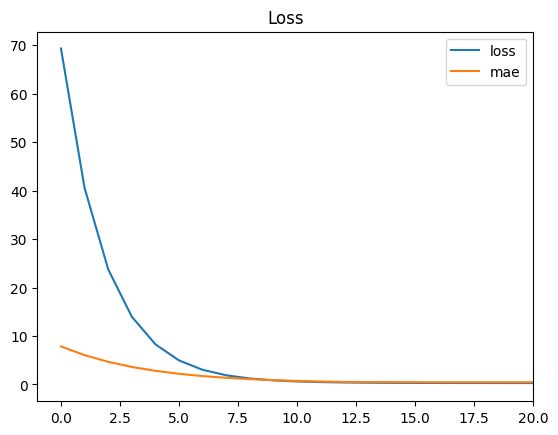

In [25]:
import matplotlib.pyplot as plt

# 20epoch까지 Loss 수렴에 대한 시각화
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['mae'], label = 'mae')
plt.xlim(-1, 20)
plt.title('Loss')
plt.legend()
plt.show()

### 2-9. 검증
evaluate()메소드로 검증 데이터셋을 입력하여 검증

In [26]:
model.evaluate(x,y)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step - loss: 9.8699e-05 - mae: 0.0085


[9.869859786704183e-05, 0.008527087979018688]

### 2-10. 예측

In [28]:
# 예측
model.predict(np.array([10]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


array([[32.041214]], dtype=float32)

## 03. 심층 신경망으로 이미지 분류

### 3-1. 케라스 내장 데이터셋 로드
- load_data() 메소드 이용

In [29]:
import tensorflow as tf

# 케라스의 내장 데이터셋에서 mnist 데이터셋 로드
mnist = tf.keras.datasets.mnist

In [30]:
# load_data()로 데이터 로드
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [31]:
# 로드된 데이터셋 확인
print('train set: ', x_train.shape, y_train.shape)
print('test set: ', x_test.shape, y_test.shape)

train set:  (60000, 28, 28) (60000,)
test set:  (10000, 28, 28) (10000,)


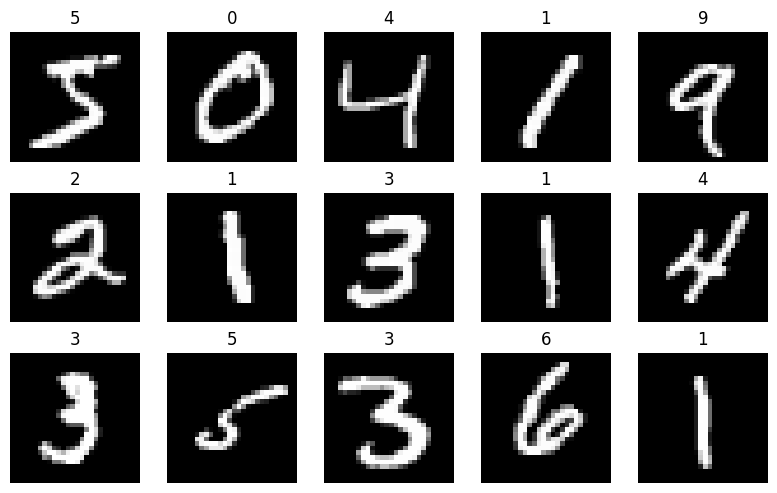

In [32]:
# 데이터 시각화
import matplotlib.pyplot as plt

# canvas 생성
fig, axes = plt.subplots(3,5)
fig.set_size_inches(8,5)

for i in range(15):
    ax = axes[i//5, i%5]
    # imshow로 이미지 시각화
    ax.imshow(x_train[i], cmap='gray')
    ax.axis('off')
    ax.set_title(str(y_train[i]))

plt.tight_layout()
plt.show()

### 3-2. 데이터 전처리
- 정규화

In [33]:
# x_train 배열의 데이터 확인
x_train[0,10:15,10:15]

array([[  1, 154, 253,  90,   0],
       [  0, 139, 253, 190,   2],
       [  0,  11, 190, 253,  70],
       [  0,   0,  35, 241, 225],
       [  0,   0,   0,  81, 240]], dtype=uint8)

In [34]:
# 픽셀 값의 최소/최대값 확인
print(f'정규화 전] 최소값: {x_train.min()}, 최대값: {x_train.max()}')

# 데이터 정규화
x_train = x_train/x_train.max()

# 정규화 후 최소/최대값 확인
print(f'정규화 후] 최소값: {x_train.min()}, 최대값: {x_train.max()}')

정규화 전] 최소값: 0, 최대값: 255
정규화 후] 최소값: 0.0, 최대값: 1.0


In [35]:
# test 셋에도 정규화 동일 적용
x_test = x_test / x_test.max()

In [36]:
# 변환 후 x_train 배열의 데이터 확인
x_train[0, 10:15, 10:15]

array([[0.00392157, 0.60392157, 0.99215686, 0.35294118, 0.        ],
       [0.        , 0.54509804, 0.99215686, 0.74509804, 0.00784314],
       [0.        , 0.04313725, 0.74509804, 0.99215686, 0.2745098 ],
       [0.        , 0.        , 0.1372549 , 0.94509804, 0.88235294],
       [0.        , 0.        , 0.        , 0.31764706, 0.94117647]])

### 3-3. Flatten 레이어
다차원 데이터를 1차원으로 펼쳐줌

In [37]:
print(f'변경 전 shape: {x_train.shape}')
print(f'ID으로 shape 변경 후: {x_train.reshape(6000, -1).shape}')

변경 전 shape: (60000, 28, 28)
ID으로 shape 변경 후: (6000, 7840)


In [38]:
print(f'변경 전 shape:{x_train.shape}')

# Flatten 레이어 적용 후 shape 확인
print(f'Flatten 적용 후: {tf.keras.layers.Flatten()(x_train).shape}')

변경 전 shape:(60000, 28, 28)
Flatten 적용 후: (60000, 784)


### 3-4. 활성화 함수
- 입력을 비선형 출력으로 변환해주는 함수
- 자주 사용하는 함수: 시그모이드, 하이퍼볼릭 탄젠트, ReLU, Leaky ReLU
- Dense 레이어에 매개변수 activation = '활성화함수' 대입

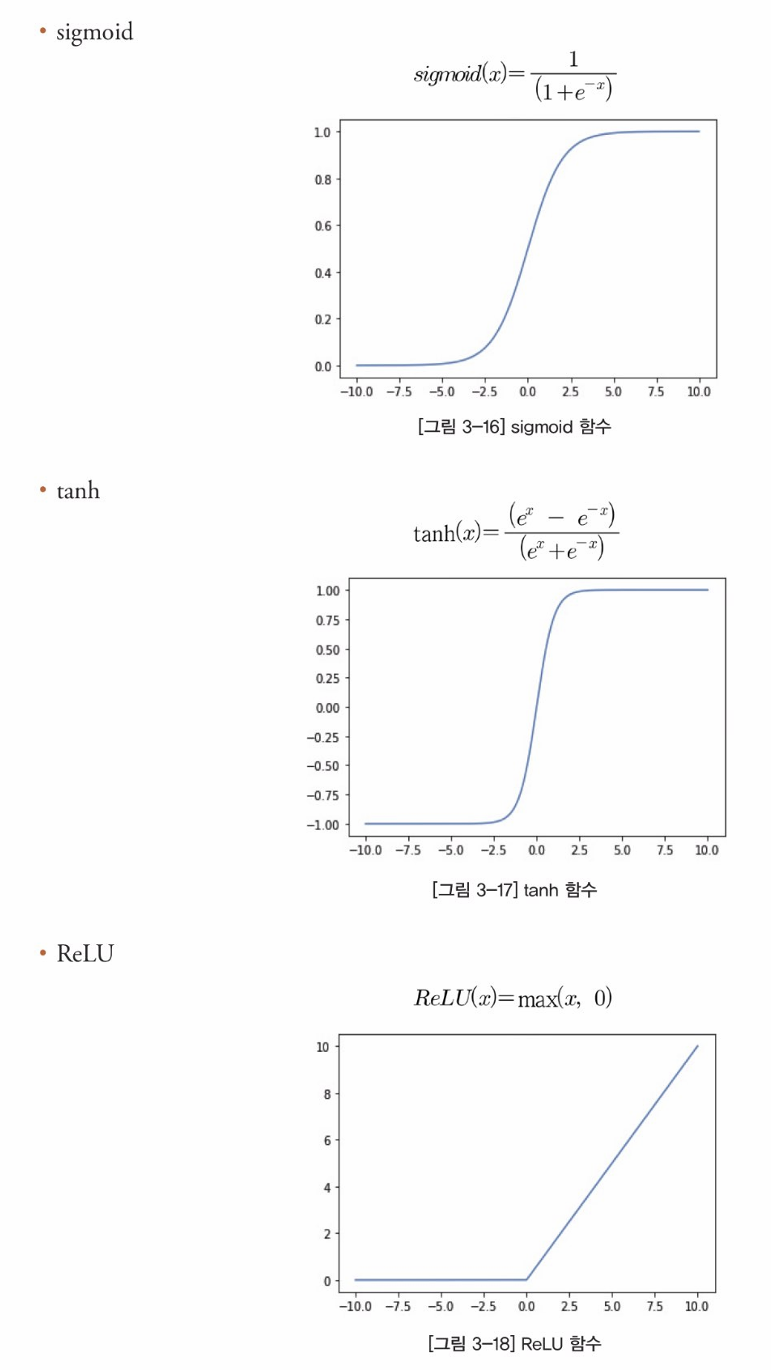

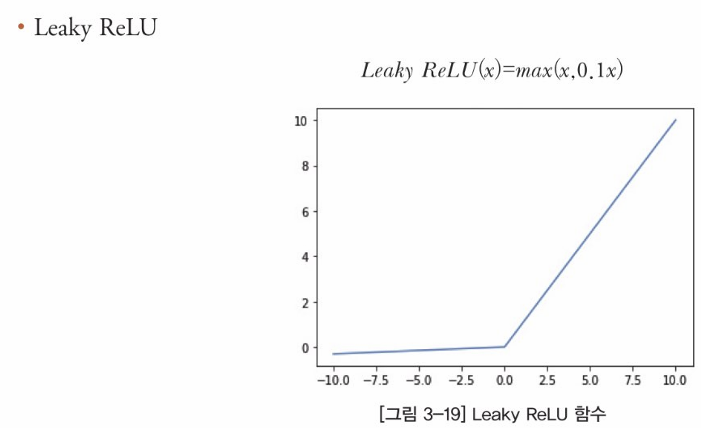

In [39]:
# Dense 레이어에 ReLU 활성화 함수를 적용한 경우
tf.keras.layers.Dense(128, activation = 'relu')

<Dense name=dense_13, built=False>

In [41]:
# Dense 레이어와 relu 활성화 함수 레이어를 별도 적용한 경우 ex. 배치 정규화 적용이후 활성화 함수 적용
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128),
    tf.keras.layers.Activation('relu')
])

### 3-5. 입력과 출력
- 첫번째 레이어에 입력 데이터 형태 (input_shape 매개변수) 지정
- 분류 모델의 가장 마지막 레이어 : 출력층
    - 노드 개수 = 분류해야할 클래스의 개수
    - 출력층 노드 개수가 2개 이상인 경우, softmax 활성화 함수 적용

In [43]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(32, activation = 'relu'),
    # 노드 = 10갸 (클래스 개수와 동일)
    tf.keras.layers.Dense(10, activation = 'softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [44]:
# 출력층 노드 = 1인 경우, sigmoid
tf.keras.layers.Dense(1, activation = 'sigmoid')

# 출력층 노드 = 2개 이상인 경우, softmax
tf.keras.layers.Dense(10, activation = 'softmax')

<Dense name=dense_21, built=False>

### 3-6. 손실함수
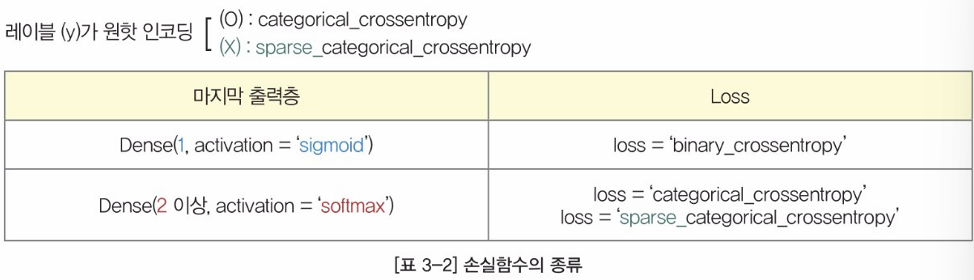

In [45]:
# 이진분류(출력 노드 개수 = 1, sigmoid인 경우)
model.compile(loss='binary_crossentropy')

In [46]:
# y가 원핫 벡터인 경우
# [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]
model.compile(loss = 'categorical_crossentropy')
# y가 원핫 벡터가 아닌 경우
# [5]
model.compile(loss = 'sparse_categorical_crossentropy')

### 3-7. 옵티마이저
- 손실을 낮추기 위해서, 신경망의 가중치와 학습률과 같은 신경망의 속성을 변경하는데 사용되는 최적화 방법
- 많이 사용되는 알고리즘: Adam
- 지정 방법
    - 클래스 인스턴스
    - 문자열


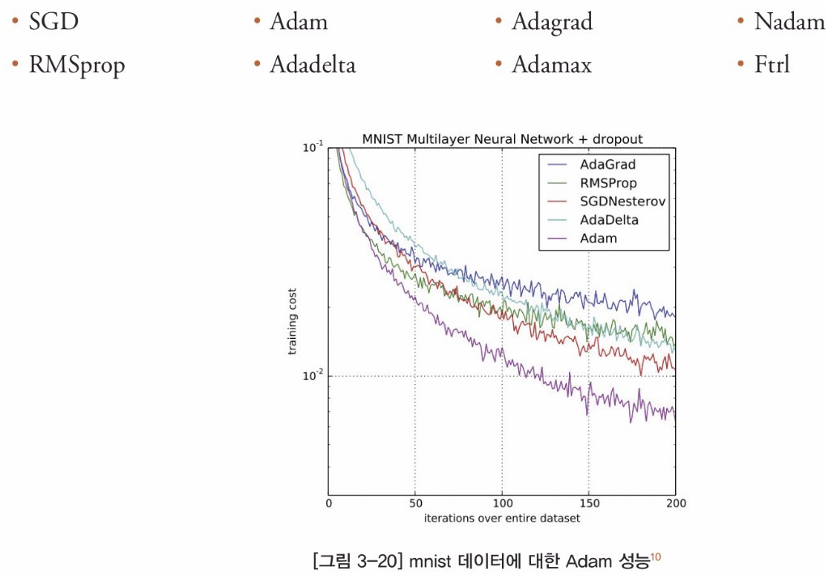

In [49]:
# 클래스 인스턴스로 지정
adam = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer = adam)

# 문자열로 지정
model.compile(optimizer='adam')

### 3-8. 평가지표
- 정확도(accuracy)
- 그외: auc, precision, recall
- 지정 방법
    - 클래스 인스턴스
    - 문자열

In [50]:
# 클래스 인스턴스로 지정
acc = tf.keras.metrics.SparseCategoricalAccuracy()

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',
              metrics=[acc])

In [51]:
# 문자열로 지정
model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy',
              metrics = ['accuracy'])

### 3-9. 훈련

In [52]:
# 훈련
model.fit(x_train, y_train,
          # 검증 셋 지정
          validation_data = (x_test, y_test),
          epochs = 10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.8723 - loss: 0.4240 - val_accuracy: 0.9612 - val_loss: 0.1193
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9711 - loss: 0.0972 - val_accuracy: 0.9731 - val_loss: 0.0860
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.9804 - loss: 0.0639 - val_accuracy: 0.9740 - val_loss: 0.0911
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.9849 - loss: 0.0479 - val_accuracy: 0.9785 - val_loss: 0.0736
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9884 - loss: 0.0354 - val_accuracy: 0.9746 - val_loss: 0.0824
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9911 - loss: 0.0278 - val_accuracy: 0.9760 - val_loss: 0.0871
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9920 - loss: 0.0244 - val_accuracy: 0.9771 - val_loss: 0.0821
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.9934 - loss: 0

### 3-10. 평가
성능 검증 및 평가 결과 확인

In [53]:
# 검증
test_loss, test_acc = model.evaluate(x_test, y_test)

print('검증 셋 정확도:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9744 - loss: 0.1160
검증 셋 정확도: 0.9775999784469604


### 3-11. 예측
- 훈련된 모델로 새로운 이미지에 대한 분류 값을 예측하는 작업 수행
- predict() 메소드: 모델의 예측 결과 반환

In [54]:
# 예측
predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [55]:
# 예측 결과 출력
predictions[0]

array([8.48666115e-09, 3.84887727e-07, 2.71659673e-08, 4.97774522e-07,
       7.80481798e-07, 1.04471531e-09, 4.57402755e-10, 9.99998152e-01,
       1.16921415e-08, 1.37066962e-07], dtype=float32)

In [56]:
import numpy as np

# 0번 index에 대한 예측 클래스 출력
print(np.argmax(predictions[0]))

# 첫 10개 index에 대한 예측 클래스 출력
print(np.argmax(predictions[:10], axis = 1))

7
[7 2 1 0 4 1 4 9 5 9]


- 15개 예측한 결과 시각화

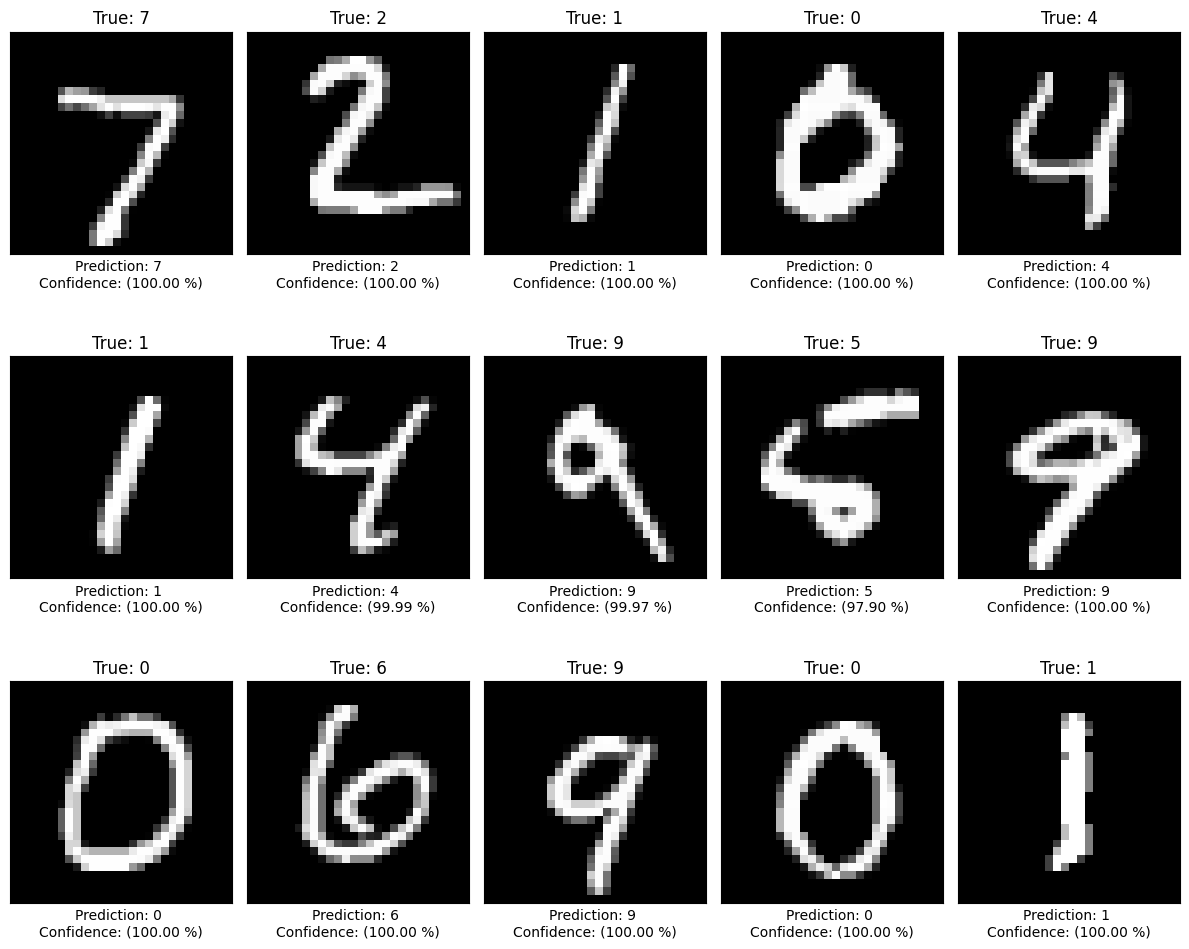

In [59]:
# 데이터 시각화
import matplotlib.pyplot as plt
def get_one_result(idx):
    img, y_true, y_pred, confidence = x_test[idx], y_test[idx], np.argmax(predictions[idx]), 100*np.max(predictions[idx])
    return img, y_true, y_pred, confidence

# canvas 생성
fig, axes = plt.subplots(3,5)
fig.set_size_inches(12,10)
for i in range(15):
    ax = axes[i//5, i%5]
    img, y_true, y_pred, confidence = get_one_result(i)
    # imshow로 이미지 시각화
    ax.imshow(img, cmap='gray')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f'True: {y_true}')
    ax.set_xlabel(f'Prediction: {y_pred} \nConfidence: ({confidence:.2f} %)')
plt.tight_layout()
plt.show()